🧠 NOTEBOOK COMPLETO — MODELO DE DATOS E-COMMERCE

🔹 1. Conexión y carga de las tablas

In [80]:
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-JBITTNM\\SQLEXPRESS;"
    "DATABASE=EcommerceDB;"
    "UID=sa;"
    "PWD=12345;"
)

print("Conectado correctamente ✔️")

# Obtener nombres de tablas
tables = pd.read_sql("""
SELECT TABLE_SCHEMA, TABLE_NAME 
FROM INFORMATION_SCHEMA.TABLES 
WHERE TABLE_TYPE = 'BASE TABLE'
""", conn)

tables


Conectado correctamente ✔️


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\271858619.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tables = pd.read_sql("""


,TABLE_SCHEMA,TABLE_NAME
0,dw,dim_cliente
1,dw,dim_producto
2,dw,dim_categoria
3,dw,dim_tiempo
4,dw,dim_metodo_pago
5,dw,dim_direccion
6,dw,fact_ventas
7,dbo,Usuarios
8,dbo,Categorias
9,dbo,Productos


🔹 2. Cargar todas las tablas a DataFrames

In [ ]:
dfs = {}

for table in tables.TABLE_NAME:
    df = pd.read_sql(f"SELECT * FROM {table}", conn)
    dfs[table] = df

dfs.keys()


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\3982887290.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(f"SELECT * FROM {table}", conn)


dict_keys(['Usuarios', 'Categorias', 'Productos', 'Ordenes', 'DetalleOrdenes', 'DireccionesEnvio', 'Carrito', 'MetodosPago', 'OrdenesMetodosPago', 'ReseñasProductos', 'HistorialPagos', 'fact_ventas'])

🧩 3. Diseño Conceptual (Entidades + Relaciones + Cardinalidades)

In [ ]:
conceptual_model = {
    "Usuarios": {
        "atributos": ["UsuarioID", "Nombre", "Email", "FechaRegistro"],
        "relaciones": {"Ordenes": "1:N", "DireccionesEnvio": "1:N", "Carrito": "1:1"}
    },
    "Productos": {
        "atributos": ["ProductoID", "Nombre", "CategoriaID", "Precio", "Stock"],
        "relaciones": {"Categorias": "N:1", "DetalleOrdenes": "1:N", "ReseñasProductos": "1:N"}
    },
    "Categorias": {
        "atributos": ["CategoriaID", "Nombre"],
        "relaciones": {"Productos": "1:N"}
    },
    "Ordenes": {
        "atributos": ["OrdenID", "UsuarioID", "FechaOrden", "Estado"],
        "relaciones": {"DetalleOrdenes": "1:N", "HistorialPagos": "1:N"}
    },
    "DetalleOrdenes": {
        "atributos": ["DetalleID", "OrdenID", "ProductoID", "Cantidad", "PrecioUnitario"],
        "relaciones": {"Productos": "N:1", "Ordenes": "N:1"}
    }
}

conceptual_model


{'Usuarios': {'atributos': ['UsuarioID', 'Nombre', 'Email', 'FechaRegistro'],
  'relaciones': {'Ordenes': '1:N',
   'DireccionesEnvio': '1:N',
   'Carrito': '1:1'}},
 'Productos': {'atributos': ['ProductoID',
   'Nombre',
   'CategoriaID',
   'Precio',
   'Stock'],
  'relaciones': {'Categorias': 'N:1',
   'DetalleOrdenes': '1:N',
   'ReseñasProductos': '1:N'}},
 'Categorias': {'atributos': ['CategoriaID', 'Nombre'],
  'relaciones': {'Productos': '1:N'}},
 'Ordenes': {'atributos': ['OrdenID', 'UsuarioID', 'FechaOrden', 'Estado'],
  'relaciones': {'DetalleOrdenes': '1:N', 'HistorialPagos': '1:N'}},
 'DetalleOrdenes': {'atributos': ['DetalleID',
   'OrdenID',
   'ProductoID',
   'Cantidad',
   'PrecioUnitario'],
  'relaciones': {'Productos': 'N:1', 'Ordenes': 'N:1'}}}

🔹 4. Diseño Lógico — Esquema Estrella (Kimball)

Hecho central: fact_ventas

Medidas:

cantidad

precio_unitario

subtotal

descuento

total_pagado

Dimensiones:

dim_cliente

dim_producto

dim_categoria

dim_tiempo

dim_direccion

dim_metodo_pago

🧠 Explicación del conceptual_model

Este diccionario representa un Modelo Conceptual de una base de datos del negocio (ecommerce), donde definimos:

Entidades (tablas conceptuales)

Atributos (campos importantes de cada entidad)

Relaciones entre entidades (1:N, N:1, 1:1)

Es decir, es un borrador conceptual del diseño de base de datos antes de pasar al modelo lógico y físico.





In [ ]:
logical_model = {
    "fact_ventas": {
        "keys": [
            "FechaID",
            "ClienteID",
            "ProductoID",
            "MetodoPagoID",
            "DireccionID",
            "OrdenID"
        ],
        "measures": [
            "Cantidad",
            "PrecioUnitario",
            "Subtotal",
            "TotalPagado"
        ]
    },
    "dim_cliente": ["ClienteID", "Nombre", "Email", "FechaRegistro"],
    "dim_producto": ["ProductoID", "Nombre", "CategoriaID", "Precio"],
    "dim_categoria": ["CategoriaID", "Nombre"],
    "dim_tiempo": ["FechaID", "Fecha", "Mes", "Año", "Trimestre"],
    "dim_direccion": ["DireccionID", "Calle", "Ciudad", "Estado"],
    "dim_metodo_pago": ["MetodoPagoID", "NombreMetodo"]
}

logical_model


{'fact_ventas': {'keys': ['FechaID',
   'ClienteID',
   'ProductoID',
   'MetodoPagoID',
   'DireccionID',
   'OrdenID'],
  'measures': ['Cantidad', 'PrecioUnitario', 'Subtotal', 'TotalPagado']},
 'dim_cliente': ['ClienteID', 'Nombre', 'Email', 'FechaRegistro'],
 'dim_producto': ['ProductoID', 'Nombre', 'CategoriaID', 'Precio'],
 'dim_categoria': ['CategoriaID', 'Nombre'],
 'dim_tiempo': ['FechaID', 'Fecha', 'Mes', 'Año', 'Trimestre'],
 'dim_direccion': ['DireccionID', 'Calle', 'Ciudad', 'Estado'],
 'dim_metodo_pago': ['MetodoPagoID', 'NombreMetodo']}

🧠 ¿Qué es logical_model?

logical_model es un diccionario en Python que describe el modelo lógico de datos de tu proyecto de análisis.
Este modelo organiza tus tablas de hechos y dimensiones tal como se usan en un Data Warehouse.

🕒 5. Definición de Slowly Changing Dimensions (SCD)

In [ ]:
scd_design = {
    "dim_cliente": {
        "campos_con_historial": ["Email", "Nombre"],
        "tipo": 2,
        "justificación": "El cliente puede cambiar email, nombre o dirección."
    },
    "dim_producto": {
        "campos_con_historial": ["Precio", "CategoriaID"],
        "tipo": 2,
        "justificación": "Necesario conservar historial de precios y cambios de categoría."
    },
    "dim_categoria": { "tipo": 1 },
    "dim_direccion": { "tipo": 1 },
    "dim_metodo_pago": { "tipo": 1 }
}

scd_design


{'dim_cliente': {'campos_con_historial': ['Email', 'Nombre'],
  'tipo': 2,
  'justificación': 'El cliente puede cambiar email, nombre o dirección.'},
 'dim_producto': {'campos_con_historial': ['Precio', 'CategoriaID'],
  'tipo': 2,
  'justificación': 'Necesario conservar historial de precios y cambios de categoría.'},
 'dim_categoria': {'tipo': 1},
 'dim_direccion': {'tipo': 1},
 'dim_metodo_pago': {'tipo': 1}}

🗂️ Diseño de SCD (scd_design)

scd_design define cómo se manejará el historial de cambios en las dimensiones usando Slowly Changing Dimensions (SCD).

Cada dimensión puede usar Tipo 1 (no guarda historial) o Tipo 2 (sí guarda historial con registros nuevos).

🧬 6. Generar Diagrama ER Automático (Graphviz)

In [ ]:
from graphviz import Digraph

g = Digraph('DW_Ecommerce', format='png')
g.attr(rankdir='LR', fontsize='10')

# ================================
#   DIMENSIONES
# ================================

dimensions = {
    "dim_cliente": [
        "PK: ClienteKey",
        "FK: ClienteID_nat",
        "Nombre",
        "Email",
        "Ciudad",
        "Estado",
        "FechaNacimiento",
        "FechaInicio",
        "FechaFin",
        "EsActual"
    ],

    "dim_producto": [
        "PK: ProductoKey",
        "FK: ProductoID_nat",
        "NombreProducto",
        "Marca",
        "Precio",
        "CategoriaID_nat",
        "FechaInicio",
        "FechaFin",
        "EsActual"
    ],

    "dim_categoria": [
        "PK: CategoriaKey",
        "CategoriaID_nat",
        "CategoriaNombre"
    ],

    "dim_tiempo": [
        "PK: TiempoKey",
        "Fecha",
        "Ano",
        "Mes",
        "Dia",
        "Trimestre"
    ],

    "dim_metodo_pago": [
        "PK: MetodoPagoKey",
        "MetodoPagoID_nat",
        "Metodo"
    ],

    "dim_direccion": [
        "PK: DireccionKey",
        "DireccionID_nat",
        "Ciudad",
        "Estado",
        "Pais",
        "CP"
    ],
}

# Crear nodos para las dimensiones
for table, fields in dimensions.items():
    g.node(table, f"{table}\n" + "\n".join(fields), shape="box", style="filled", color="#D5E8D4")

# ================================
#   TABLA DE HECHOS
# ================================

fact_fields = [
    "PK: VentaKey",
    "FK: ClienteKey",
    "FK: ProductoKey",
    "FK: CategoriaKey",
    "FK: TiempoKey",
    "FK: MetodoPagoKey",
    "FK: DireccionKey",
    "Cantidad",
   "PrecioUnitario",
    "Subtotal",
    "Total",
] 

g.node("fact_ventas", "fact_ventas\n" + "\n".join(fact_fields),
       shape="box", style="filled", color="#F8CECC")

# ================================
#   RELACIONES FACT ↔ DIM
# ================================

g.edge("dim_cliente", "fact_ventas", label="1:N")
g.edge("dim_producto", "fact_ventas", label="1:N")
g.edge("dim_categoria", "fact_ventas", label="1:N")
g.edge("dim_tiempo", "fact_ventas", label="1:N")
g.edge("dim_metodo_pago", "fact_ventas", label="1:N")
g.edge("dim_direccion", "fact_ventas", label="1:N")

# Exportar
g.render("ERD_Ecommerce", view=True)



'ERD_Ecommerce.png'

📊 Explicación del código del diagrama ERD (Graphviz)

Este script crea un diagrama del Data Warehouse de e-commerce mostrando:

Dimensiones (con claves naturales y surrogate keys)

Tabla de hechos

Relaciones 1:N entre dimensiones y hechos

Se utiliza la librería Graphviz para generar un archivo ERD_Ecommerce.png.

🧱 1. Definición de dimensiones
dimensions = { ... }


Cada dimensión se define como un diccionario donde:

La key es el nombre de la dimensión

El value es una lista de atributos

Incluye:

PK (surrogate key para DW)

FK nativa (*_nat)

Atributos propios

Campos de SCD Tipo 2 (FechaInicio, FechaFin, EsActual) cuando aplica

Ejemplo: dim_cliente contiene datos de cliente y metadata SCD2.

ANALISIS DEL PROYECTO

In [ ]:
doc = """
# Documentación del Modelo de Datos para Ecommerce

## 1. Diseño Conceptual
El modelo conceptual identifica las entidades principales del negocio: Usuarios, Productos,
Categorías, Órdenes, Detalle de Órdenes, Métodos de Pago y Direcciones de Envío.

Las relaciones clave incluyen:
- Un usuario puede generar múltiples órdenes (1:N).
- Una orden contiene múltiples productos a través del detalle de órdenes (1:N).
- Un producto pertenece a una categoría (N:1).

## 2. Diseño Lógico
Se adopta un enfoque de Data Warehouse basado en Kimball, utilizando un esquema estrella.
El hecho central es `fact_ventas`, que captura transacciones de venta.

Las dimensiones permiten analizar ventas por cliente, producto, tiempo, método de pago y dirección.

## 3. Hechos y Medidas
- Medidas cuantitativas: cantidad, precio unitario, subtotal, total pagado.
- Hecho granular: una fila por línea de venta (producto dentro de orden).

## 4. Dimensiones
- Clientes: características para análisis demográfico.
- Productos y Categorías: información de catálogo.
- Tiempo: análisis temporal.
- Métodos de pago: clasificaciones de pagos.
- Direcciones: ubicación del cliente.

## 5. Slowly Changing Dimensions
Se implementa SCD Tipo 2 en clientes y productos para preservar historial.
Otras dimensiones usan SCD Tipo 1 por estabilidad estructural.

## 6. Diagrama ER
El diagrama generado con Graphviz refleja entidades, relaciones y cardinalidades.
"""

print(doc)



# Documentación del Modelo de Datos para Ecommerce

## 1. Diseño Conceptual
El modelo conceptual identifica las entidades principales del negocio: Usuarios, Productos,
Categorías, Órdenes, Detalle de Órdenes, Métodos de Pago y Direcciones de Envío.

Las relaciones clave incluyen:
- Un usuario puede generar múltiples órdenes (1:N).
- Una orden contiene múltiples productos a través del detalle de órdenes (1:N).
- Un producto pertenece a una categoría (N:1).

## 2. Diseño Lógico
Se adopta un enfoque de Data Warehouse basado en Kimball, utilizando un esquema estrella.
El hecho central es `fact_ventas`, que captura transacciones de venta.

Las dimensiones permiten analizar ventas por cliente, producto, tiempo, método de pago y dirección.

## 3. Hechos y Medidas
- Medidas cuantitativas: cantidad, precio unitario, subtotal, total pagado.
- Hecho granular: una fila por línea de venta (producto dentro de orden).

## 4. Dimensiones
- Clientes: características para análisis demográfico.
- Produc

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime, timedelta

# Conexión a SQL Server
server = "DESKTOP-JBITTNM\\SQLEXPRESS"
database = "EcommerceDB"
username = "sa"
password = "12345"

conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(conn_str)

# Leer tablas
ordenes = pd.read_sql("SELECT * FROM Ordenes", engine)
detalle = pd.read_sql("SELECT * FROM DetalleOrdenes", engine)
productos = pd.read_sql("SELECT * FROM Productos", engine)
categorias = pd.read_sql("SELECT * FROM Categorias", engine)
usuarios = pd.read_sql("SELECT * FROM Usuarios", engine)

# Combinar en tabla de hechos
ventas = detalle.merge(ordenes, on="OrdenID") \
                .merge(productos, on="ProductoID") \
                .merge(categorias, on="CategoriaID") \
                .merge(usuarios, on="UsuarioID", how="left")

# Columna subtotal
ventas['Subtotal'] = ventas['Cantidad'] * ventas['PrecioUnitario']

# Columna mes para análisis temporal
ventas['Mes'] = ventas['FechaOrden'].dt.to_period('M')

print("Datos cargados y combinados correctamente")


Datos cargados y combinados correctamente


In [ ]:
# -------------------------------
# Cargar tabla DireccionesEnvio
# -------------------------------
direcciones = pd.read_sql("SELECT * FROM DireccionesEnvio", engine)

# Verificar columnas
print(direcciones.columns)
direcciones.head()


Index(['DireccionID', 'UsuarioID', 'Calle', 'Ciudad', 'Departamento',
       'Provincia', 'Distrito', 'Estado', 'CodigoPostal', 'Pais'],
      dtype='object')


,DireccionID,UsuarioID,Calle,Ciudad,Departamento,Provincia,Distrito,Estado,CodigoPostal,Pais
0,1,1,Diagonal Chilecito N° 335,Comodoro Rivadavia,Mendoza,Mendoza,Recoleta,Mendoza,10044733,Argentina
1,2,2,Diagonal Río Negro N° 497,Rawson,Tierra del Fuego,Tierra del Fuego,Palermo,Tierra del Fuego,76007280,Argentina
2,3,3,Blv. Formosa N° 118,Mar del Plata,Salta,Salta,Barracas,Salta,53604249,Argentina
3,4,4,Avenida La Rioja N° 612,San Juan,Neuquén,Neuquén,Flores,Neuquén,91031542,Argentina
4,5,5,Calle Neuquén N° 535,San Juan,Catamarca,Catamarca,Barracas,Catamarca,33002152,Argentina


In [ ]:
fecha_limite = datetime.now() - timedelta(days=180)
ventas_recientes = ventas[ventas['FechaOrden'] >= fecha_limite]

top_productos = ventas_recientes.groupby(['Nombre_y', 'Nombre_x'])\
    .agg(TotalVendida=('Cantidad', 'sum'),
         IngresosGenerados=('Subtotal', 'sum'))\
    .sort_values('TotalVendida', ascending=False)

top_productos.head(10)


,,TotalVendida,IngresosGenerados
Nombre_y,Nombre_x,,
Hogar y Cocina,Juego de Sábanas Queen,136,36241.40
Mascotas,Alimento para Perro 10kg,126,29657.00
Juguetes y Juegos,Juego de Mesa Monopoly,111,29360.92
Mascotas,Arenero para Gato,108,26479.88
Automotriz,Cámara de Reversa,105,25026.63
Mascotas,Juguete Mordedor Canino,99,21161.36
Automotriz,Aceite de Motor 5W30,98,23937.26
Moda,Camiseta Básica Hombre,97,20753.77
Videojuegos,Consola PlayStation 5,96,23339.50


In [ ]:
clientes = ventas.groupby(['UsuarioID', 'Nombre'])\
    .agg(OrdenesRealizadas=('OrdenID', 'nunique'),
         GastoTotal=('Subtotal', 'sum'))\
    .assign(TicketPromedio=lambda x: x['GastoTotal']/x['OrdenesRealizadas'])\
    .sort_values('GastoTotal', ascending=False)

clientes.head(10)


,,OrdenesRealizadas,GastoTotal,TicketPromedio
UsuarioID,Nombre,,,
940,Amada,5,41268.32,8253.664000
424,Asdrubal,3,40371.28,13457.093333
283,Daniela,4,39756.03,9939.007500
843,Fermín,4,39667.85,9916.962500
981,Felicia,4,39199.75,9799.937500
540,Marciano,5,38352.12,7670.424000
783,Eligio,4,37161.46,9290.365000
856,Efraín,4,36844.82,9211.205000
820,Celia,3,36436.64,12145.546667


In [ ]:
clientes_mes = ventas.groupby(['Mes', 'UsuarioID']).size().reset_index(name='Compras')
clientes_mes['TipoCliente'] = clientes_mes['Compras'].apply(lambda x: 'Recurrente' if x > 1 else 'Nuevo')

porcentaje = clientes_mes.groupby(['Mes', 'TipoCliente']).size()\
    .groupby(level=0).apply(lambda x: x/x.sum()*100)

porcentaje


Mes      Mes      TipoCliente
2024-06  2024-06  Recurrente     100.00000
2024-07  2024-07  Recurrente     100.00000
2024-08  2024-08  Recurrente     100.00000
2024-09  2024-09  Recurrente     100.00000
2024-10  2024-10  Recurrente     100.00000
2024-11  2024-11  Recurrente     100.00000
2024-12  2024-12  Recurrente     100.00000
2025-01  2025-01  Nuevo            1.06383
                  Recurrente      98.93617
2025-02  2025-02  Recurrente     100.00000
2025-03  2025-03  Recurrente     100.00000
2025-04  2025-04  Recurrente     100.00000
2025-05  2025-05  Recurrente     100.00000
2025-06  2025-06  Recurrente     100.00000
dtype: float64

In [ ]:
rotacion_productos = ventas.groupby('Nombre_x')\
    .agg(TotalVendida=('Cantidad', 'sum'))\
    .sort_values('TotalVendida', ascending=False)

rotacion_productos.head(10)  # mayor rotación
rotacion_productos.tail(10)  # menor rotación


,TotalVendida
Nombre_x,
Alcohol en Gel 500ml,803
Cámara de Reversa,777
Limpiaparabrisas Universal,777
"Power Bank 20,000mAh",777
Mochila Deportiva Nike,771
Perfume Hombre 100ml,770
Bicicleta Montaña Aro 29,757
Pelota de Fútbol Profesional,750
Plancha para Cabello Remington,707


Columnas en DireccionesEnvio: Index(['DireccionID', 'UsuarioID', 'Calle', 'Ciudad', 'Departamento',
       'Provincia', 'Distrito', 'Estado', 'CodigoPostal', 'Pais'],
      dtype='object')
Columnas en Ordenes: Index(['OrdenID', 'UsuarioID', 'FechaOrden', 'Total', 'Estado'], dtype='object')
                     PedidosPendientes  TotalPedidos  PorcentajePendientes
Estado_direccion                                                          
La Rioja                           114           408             27.941176
Entre Ríos                         115           415             27.710843
La Pampa                           133           481             27.650728
Buenos Aires                       101           373             27.077748
Chaco                              107           401             26.683292
Formosa                            143           538             26.579926
Santiago del Estero                 94           359             26.183844
Río Negro                         

C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\1829746082.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=demoras.head(10), x='PorcentajePendientes', y=demoras.head(10).index, palette="Reds_r")


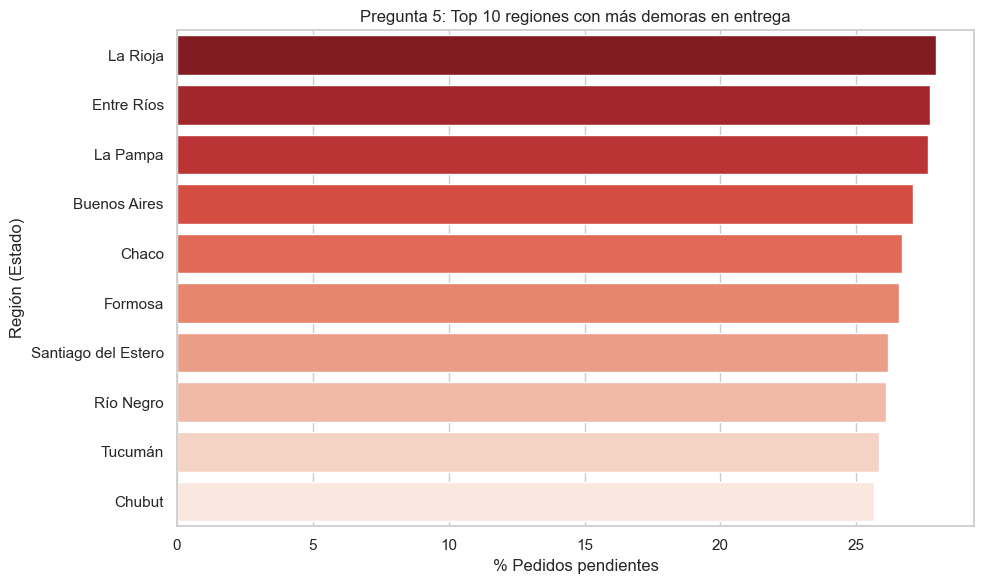

In [ ]:
# -------------------------------
# Pregunta 5: Regiones con más demoras (versión funcional)
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Cargar tabla DireccionesEnvio
direcciones = pd.read_sql("SELECT * FROM DireccionesEnvio", engine)
print("Columnas en DireccionesEnvio:", direcciones.columns)
direcciones.head()

# 2️⃣ Asegurarse de tener la tabla Ordenes (ventas)
ventas = pd.read_sql("SELECT * FROM Ordenes", engine)
print("Columnas en Ordenes:", ventas.columns)
ventas.head()

# 3️⃣ Merge usando UsuarioID
ventas_completo = ventas.merge(
    direcciones,
    on='UsuarioID',  # relación por usuario
    how='left',
    suffixes=('_orden', '_direccion')
)

# 4️⃣ Columna binaria: 1 si pendiente, 0 si completado/enviado
ventas_completo['Pendiente'] = ventas_completo['Estado_orden'].apply(lambda x: 1 if x=='Pendiente' else 0)

# 5️⃣ Agrupar por Estado de la dirección para ver regiones con demoras
demoras = ventas_completo.groupby('Estado_direccion').agg(
    PedidosPendientes=('Pendiente', 'sum'),
    TotalPedidos=('OrdenID', 'count')
).assign(
    PorcentajePendientes=lambda x: x['PedidosPendientes']/x['TotalPedidos']*100
).sort_values('PorcentajePendientes', ascending=False)

# 6️⃣ Mostrar top 10
print(demoras.head(10))

# 7️⃣ Graficar y guardar como PNG
plt.figure(figsize=(10,6))
sns.barplot(data=demoras.head(10), x='PorcentajePendientes', y=demoras.head(10).index, palette="Reds_r")
plt.title("Pregunta 5: Top 10 regiones con más demoras en entrega")
plt.xlabel("% Pedidos pendientes")
plt.ylabel("Región (Estado)")
plt.tight_layout()
plt.savefig("Pregunta5_RegionesDemora.png")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Conexión SQL Server
server = r"DESKTOP-JBITTNM\SQLEXPRESS"
database = "EcommerceDB"
username = "sa"
password = "12345"

conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(conn_str)

# Cargar tablas principales
ordenes = pd.read_sql("SELECT * FROM Ordenes", engine)
detalle = pd.read_sql("SELECT * FROM DetalleOrdenes", engine)
productos = pd.read_sql("SELECT * FROM Productos", engine)
categorias = pd.read_sql("SELECT * FROM Categorias", engine)
usuarios = pd.read_sql("SELECT * FROM Usuarios", engine)
direcciones = pd.read_sql("SELECT * FROM DireccionesEnvio", engine)
metodos_pago = pd.read_sql("SELECT * FROM MetodosPago", engine)

# Mostrar columnas de ejemplo
print("Ordenes:", ordenes.columns)
print("DetalleOrdenes:", detalle.columns)
print("Productos:", productos.columns)


Ordenes: Index(['OrdenID', 'UsuarioID', 'FechaOrden', 'Total', 'Estado'], dtype='object')
DetalleOrdenes: Index(['DetalleID', 'OrdenID', 'ProductoID', 'Cantidad', 'PrecioUnitario'], dtype='object')
Productos: Index(['ProductoID', 'Nombre', 'Descripcion', 'Precio', 'Stock',
       'CategoriaID'],
      dtype='object')


In [ ]:
print(ordenes.columns)


Index(['OrdenID', 'UsuarioID', 'FechaOrden', 'Total', 'Estado'], dtype='object')


In [ ]:
print(usuarios.columns)


Index(['UsuarioID', 'Nombre', 'Apellido', 'DNI', 'Email', 'Contraseña',
       'FechaRegistro'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aseguramos estilo de seaborn
sns.set(style="whitegrid")

# Supongo que ya tienes la tabla ventas combinada:
# ventas = detalle.merge(ordenes)...merge(usuarios)
# Con columnas principales: 
# ['OrdenID','UsuarioID','ProductoID','CategoriaID','Cantidad','PrecioUnitario','Subtotal','FechaOrden','Mes']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya cargaste las tablas desde SQL Server
# Y combinaste así:

ventas = detalle.merge(ordenes, on="OrdenID") \
                .merge(productos.rename(columns={'Nombre':'Producto'}), on="ProductoID") \
                .merge(categorias.rename(columns={'Nombre':'Categoria'}), on="CategoriaID") \
                .merge(usuarios, on="UsuarioID", how="left")

# Columna subtotal
ventas['Subtotal'] = ventas['Cantidad'] * ventas['PrecioUnitario']

# Columna mes para análisis temporal
ventas['Mes'] = ventas['FechaOrden'].dt.to_period('M')

print("Tabla de ventas lista con columnas limpias")
print(ventas.columns)


Tabla de ventas lista con columnas limpias
Index(['DetalleID', 'OrdenID', 'ProductoID', 'Cantidad', 'PrecioUnitario',
       'UsuarioID', 'FechaOrden', 'Total', 'Estado', 'Producto',
       'Descripcion_x', 'Precio', 'Stock', 'CategoriaID', 'Categoria',
       'Descripcion_y', 'Nombre', 'Apellido', 'DNI', 'Email', 'Contraseña',
       'FechaRegistro', 'Subtotal', 'Mes'],
      dtype='object')


                      TotalVentas
Categoria                        
Juguetes y Juegos       681765.17
Libros y Papelería      678118.98
Videojuegos             677175.81
Mascotas                658441.48
Tecnología y Gadgets    647997.09
Moda                    637860.24
Salud                   636236.46
Electrónica             634100.60
Automotriz              607591.73
Hogar y Cocina          604423.24


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\4077099821.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalVentas', y=ventas_categoria.index, data=ventas_categoria, palette="Blues_r")


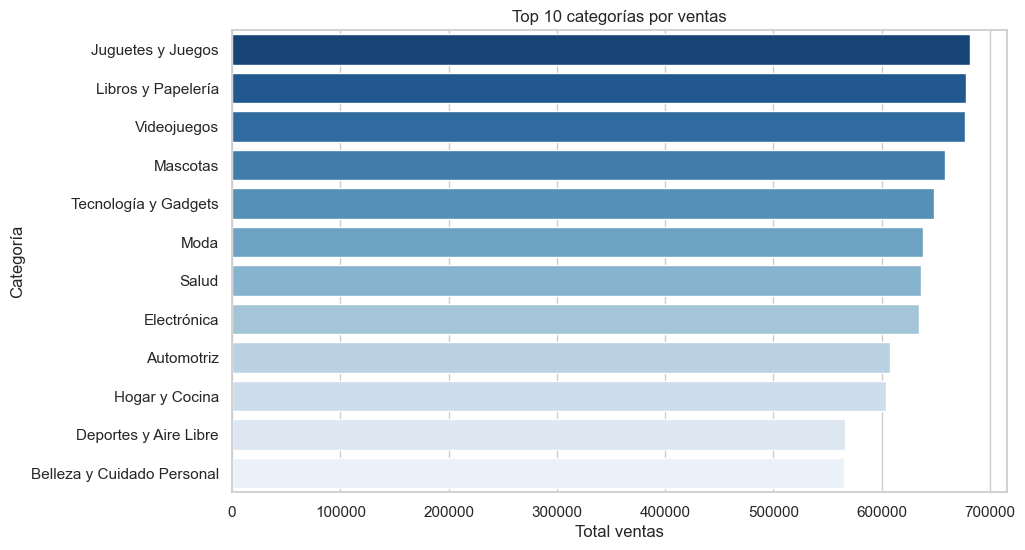

In [ ]:
ventas_categoria = ventas.groupby('Categoria').agg(
    TotalVentas=('Subtotal', 'sum')
).sort_values('TotalVentas', ascending=False)

print(ventas_categoria.head(10))

# Gráfico
plt.figure(figsize=(10,6))
sns.barplot(x='TotalVentas', y=ventas_categoria.index, data=ventas_categoria, palette="Blues_r")
plt.title("Top 10 categorías por ventas")
plt.xlabel("Total ventas")
plt.ylabel("Categoría")
plt.show()


                             TotalCantidad
Producto                                  
Juego de Mesa Monopoly                 942
Consola PlayStation 5                  935
Termómetro Digital                     898
Jeans Skinny Mujer                     887
Smartwatch Xiaomi Mi Band 8            887
Mini Proyector LED                     885
Cuaderno Universitario 100h            876
Arenero para Gato                      874
Camiseta Básica Hombre                 868
Set de Lápices de Colores              856


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\1494627253.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalCantidad', y=productos_vendidos.index, data=productos_vendidos, palette="Greens_r")


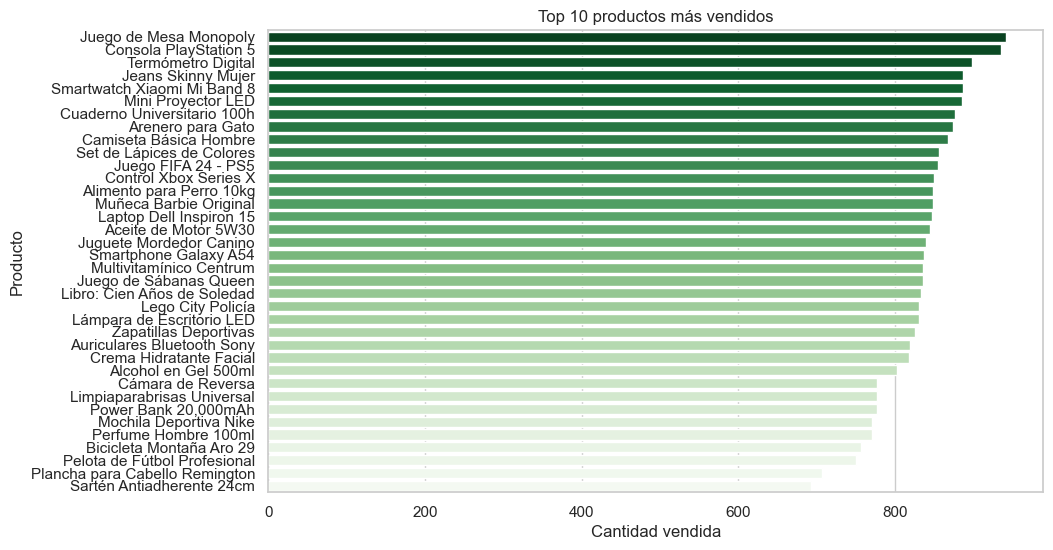

In [ ]:
productos_vendidos = ventas.groupby('Producto').agg(
    TotalCantidad=('Cantidad', 'sum')
).sort_values('TotalCantidad', ascending=False)

print(productos_vendidos.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x='TotalCantidad', y=productos_vendidos.index, data=productos_vendidos, palette="Greens_r")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Cantidad vendida")
plt.ylabel("Producto")
plt.show()


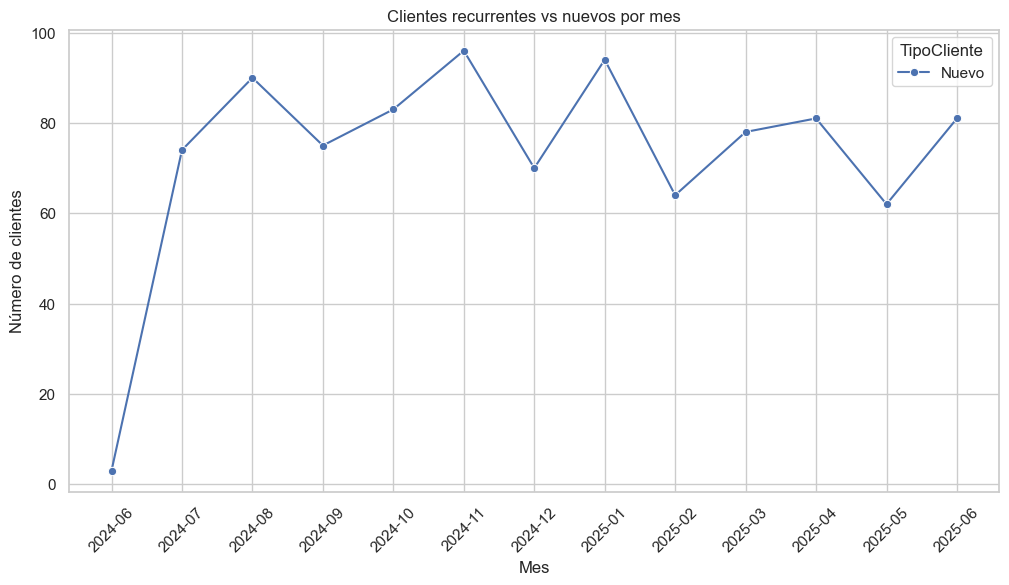

In [ ]:
# Asegúrate de que la columna Mes sea de tipo string para seaborn
clientes_mes['Mes_str'] = clientes_mes['Mes'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=clientes_mes,
    x='Mes_str',          # usar la columna string
    y='UsuarioID',
    hue='TipoCliente',
    marker='o'
)
plt.title("Clientes recurrentes vs nuevos por mes")
plt.ylabel("Número de clientes")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.show()


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\388683534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


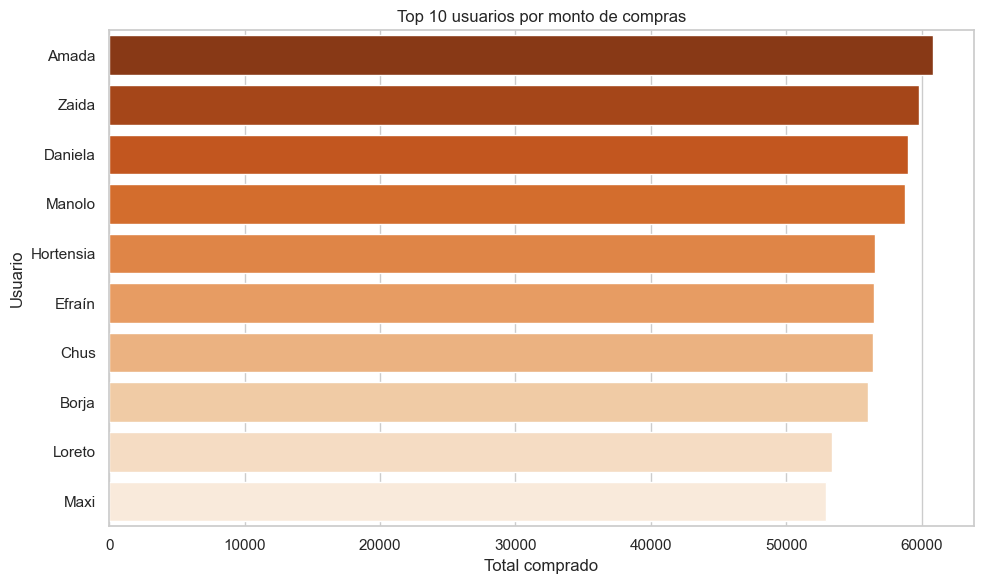

In [ ]:
ventas_usuario = ventas.groupby('Nombre').agg(
    TotalCompras=('Subtotal', 'sum')
).sort_values('TotalCompras', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=ventas_usuario.head(10).reset_index(),
    x='TotalCompras',
    y='Nombre',
    palette="Oranges_r"
)
plt.title("Top 10 usuarios por monto de compras")
plt.xlabel("Total comprado")
plt.ylabel("Usuario")
plt.tight_layout()
plt.show()


In [ ]:
server = "DESKTOP-JBITTNM\\SQLEXPRESS"


In [ ]:
# Opción 1: con instancia
server = "DESKTOP-JBITTNM\\SQLEXPRESS"

# Opción 2: usando localhost y puerto (1433 es el default de TCP)
server = "localhost,1433"

# Opción 3: solo localhost (si es instancia por defecto)
server = "localhost"


In [ ]:
import pyodbc

conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-JBITTNM\\SQLEXPRESS;'
    'DATABASE=EcommerceDB;'
    'UID=sa;PWD=12345'
)
cursor = conn.cursor()
cursor.execute("SELECT TOP 5 * FROM Ordenes")
for row in cursor:
    print(row)
conn.close()


(1, 153, datetime.datetime(2024, 9, 9, 9, 10, 27), Decimal('393.81'), 'Enviado')
(2, 810, datetime.datetime(2024, 9, 29, 9, 10, 27), Decimal('918.85'), 'Completado')
(3, 404, datetime.datetime(2024, 11, 3, 9, 10, 27), Decimal('391.29'), 'Pendiente')
(4, 52, datetime.datetime(2024, 9, 14, 9, 10, 27), Decimal('250.03'), 'Cancelado')
(5, 811, datetime.datetime(2025, 4, 11, 9, 10, 27), Decimal('983.13'), 'Completado')


In [ ]:
ventas['Subtotal'] = ventas['Cantidad'] * ventas['PrecioUnitario']


In [ ]:
ventas['Pendiente'] = ventas['Estado'].apply(lambda x: 1 if x=='Pendiente' else 0)

demoras = ventas.groupby('Estado').agg(
    PedidosPendientes=('Pendiente', 'sum'),
    TotalPedidos=('OrdenID', 'count')
).assign(
    PorcentajePendientes=lambda x: x['PedidosPendientes']/x['TotalPedidos']*100
).sort_values('PorcentajePendientes', ascending=False)

print(demoras)


            PedidosPendientes  TotalPedidos  PorcentajePendientes
Estado                                                           
Pendiente                2443          2443                 100.0
Cancelado                   0          2524                   0.0
Completado                  0          2671                   0.0
Enviado                     0          2362                   0.0


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\2082753884.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


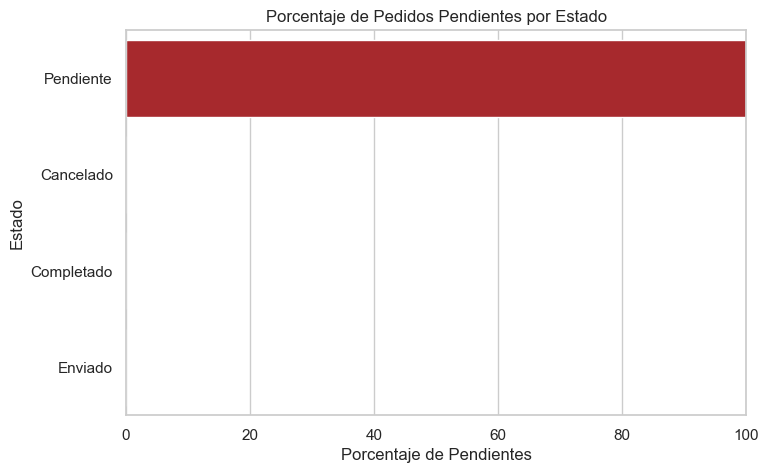

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(
    data=demoras.reset_index(),
    x='PorcentajePendientes',
    y='Estado',
    palette='Reds_r'
)
plt.title('Porcentaje de Pedidos Pendientes por Estado')
plt.xlabel('Porcentaje de Pendientes')
plt.ylabel('Estado')
plt.xlim(0, 100)
plt.show()


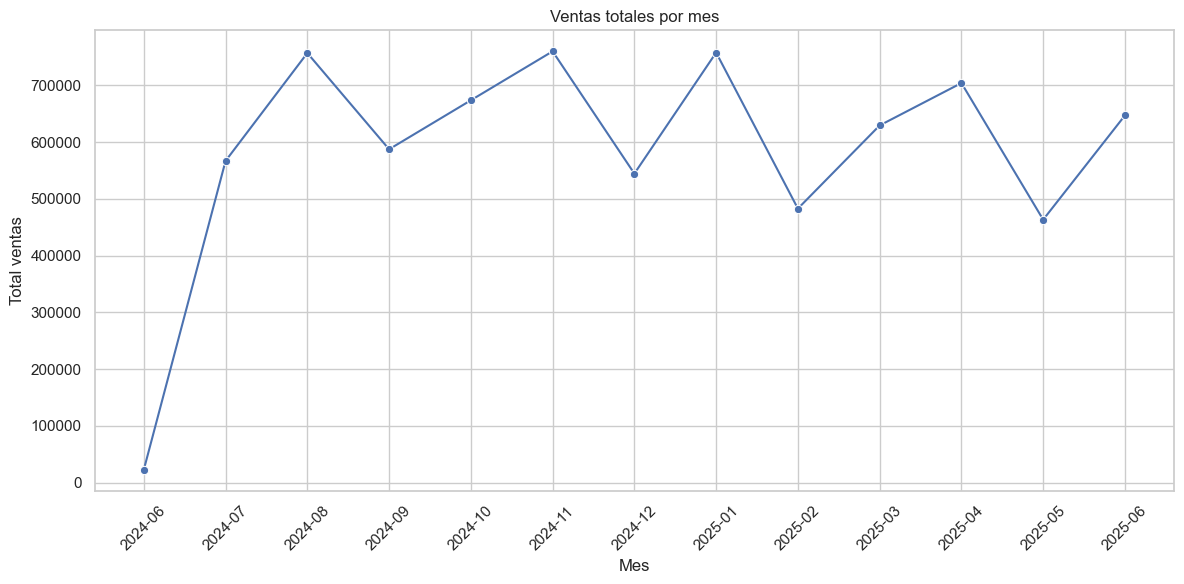

In [ ]:
ventas_mes = ventas.groupby(ventas['FechaOrden'].dt.to_period('M')).Subtotal.sum().reset_index()
ventas_mes['Mes_str'] = ventas_mes['FechaOrden'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=ventas_mes,
    x='Mes_str',
    y='Subtotal',
    marker='o'
)
plt.title("Ventas totales por mes")
plt.ylabel("Total ventas")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\672727214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


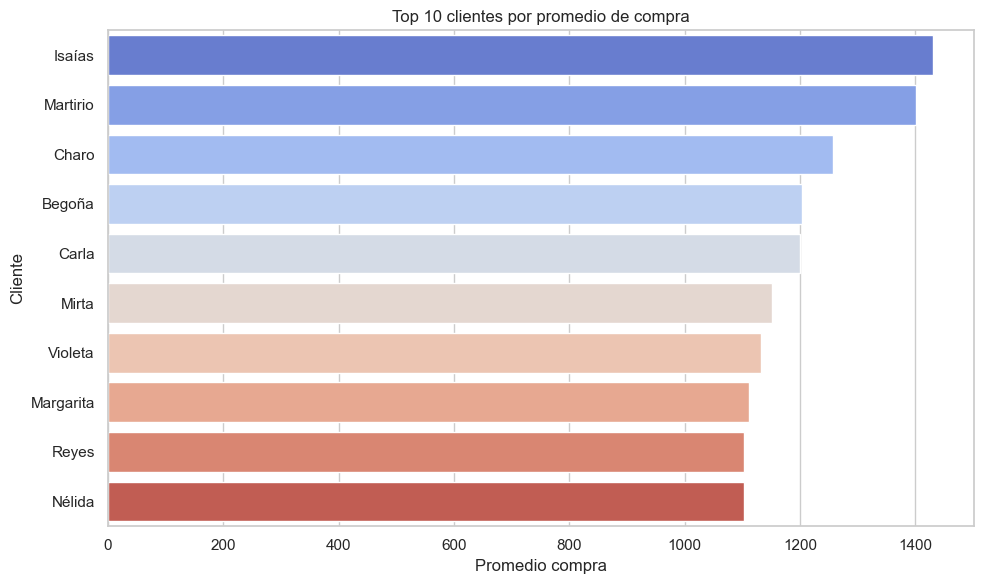

In [ ]:
promedio_cliente = ventas.groupby('Nombre').Subtotal.mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=promedio_cliente.head(10).reset_index(),
    x='Subtotal',
    y='Nombre',
    palette="coolwarm"
)
plt.title("Top 10 clientes por promedio de compra")
plt.xlabel("Promedio compra")
plt.ylabel("Cliente")
plt.tight_layout()
plt.show()


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\2533575395.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


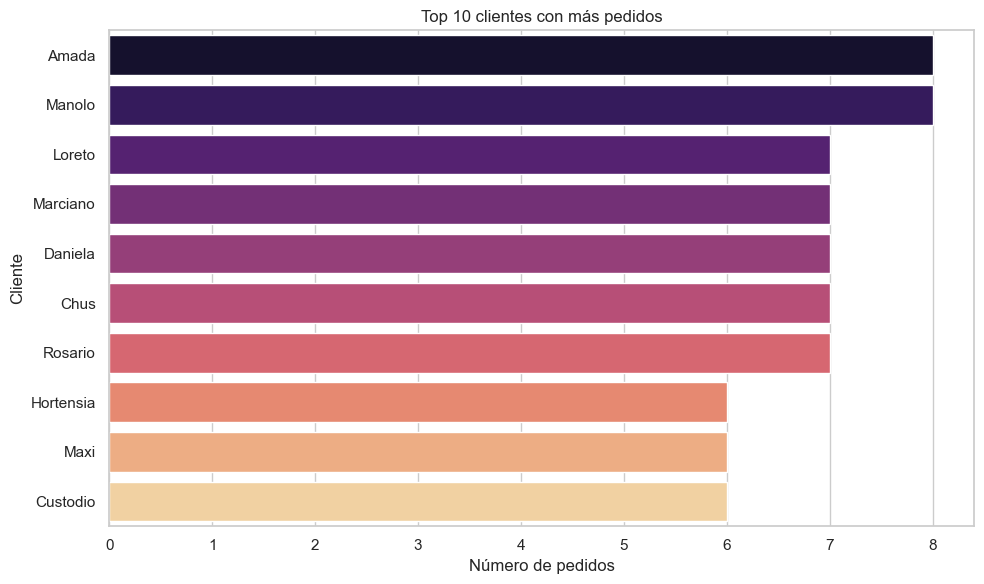

In [ ]:
clientes_pedidos = ventas.groupby('Nombre').OrdenID.nunique().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=clientes_pedidos.head(10).reset_index(),
    x='OrdenID',
    y='Nombre',
    palette="magma"
)
plt.title("Top 10 clientes con más pedidos")
plt.xlabel("Número de pedidos")
plt.ylabel("Cliente")
plt.tight_layout()
plt.show()


In [81]:
ventas['Pendiente'] = ventas['Estado'].apply(lambda x: 1 if x == 'Pendiente' else 0)

demoras = ventas.groupby('Estado').agg(
    PedidosPendientes=('Pendiente', 'sum'),
    TotalPedidos=('OrdenID', 'count')
).assign(
    PorcentajePendientes=lambda x: x['PedidosPendientes'] / x['TotalPedidos'] * 100
).sort_values('PorcentajePendientes', ascending=False)

demoras


,PedidosPendientes,TotalPedidos,PorcentajePendientes
Estado,,,
Pendiente,2443,2443,100.0
Cancelado,0,2524,0.0
Completado,0,2671,0.0
Enviado,0,2362,0.0


In [87]:
conn_str = (
    "mssql+pyodbc:///?odbc_connect="
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-JBITTNM\\SQLEXPRESS;"
    "DATABASE=EcommerceDB;"
    "UID=sa;"
    "PWD=12345;"
    "Trusted_Connection=no;"
)


In [86]:
from sqlalchemy import create_engine
engine = create_engine(conn_str, fast_executemany=True)


In [88]:
# Asumiendo que DireccionesEnvio tiene columnas: UsuarioID, Provincia
clientes_provincia = direcciones.groupby("Provincia")["UsuarioID"].nunique().reset_index()
clientes_provincia = clientes_provincia.rename(columns={"UsuarioID": "TotalClientes"})
clientes_provincia = clientes_provincia.sort_values(by="TotalClientes", ascending=False)

print(clientes_provincia)


              Provincia  TotalClientes
7               Formosa             55
21     Tierra del Fuego             53
3                Chubut             53
15                Salta             52
9              La Pampa             47
11              Mendoza             47
1             Catamarca             46
16             San Juan             45
5               Córdoba             44
17             San Luis             44
13              Neuquén             44
22              Tucumán             43
6            Entre Ríos             43
2                 Chaco             42
14            Río Negro             42
8                 Jujuy             42
12             Misiones             40
19             Santa Fe             39
10             La Rioja             38
20  Santiago del Estero             37
0          Buenos Aires             36
4            Corrientes             34
18           Santa Cruz             34


C:\Users\luisb\AppData\Local\Temp\ipykernel_7832\589080692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clientes_provincia, x="Provincia", y="TotalClientes", palette="viridis")


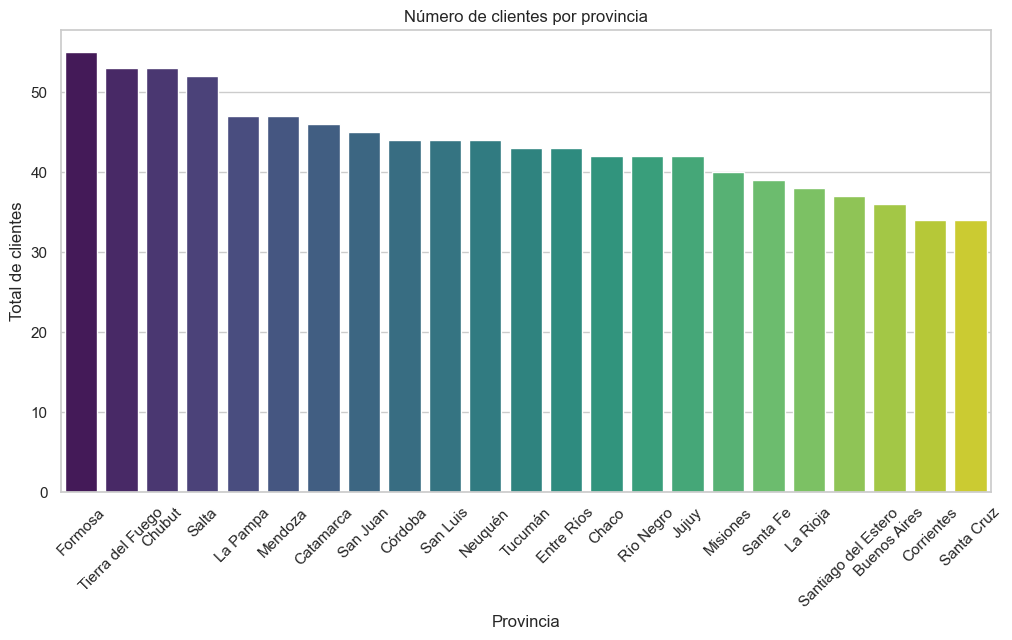

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(data=clientes_provincia, x="Provincia", y="TotalClientes", palette="viridis")
plt.xticks(rotation=45)
plt.title("Número de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Total de clientes")
plt.show()


In [92]:
from graphviz import Digraph

g = Digraph('DW_Ecommerce', format='png')
g.attr(rankdir='LR', fontsize='10')

# Nodos dimensiones
g.node("dim_cliente", "dim_cliente\nPK: ClienteKey\nNombre\nEmail", shape="box", style="filled", color="#D5E8D4")
g.node("dim_producto", "dim_producto\nPK: ProductoKey\nNombreProducto\nPrecio", shape="box", style="filled", color="#D5E8D4")
g.node("dim_categoria", "dim_categoria\nPK: CategoriaKey\nNombre", shape="box", style="filled", color="#D5E8D4")
g.node("dim_tiempo", "dim_tiempo\nPK: TiempoKey\nFecha\nMes\nAño", shape="box", style="filled", color="#D5E8D4")
g.node("dim_metodo_pago", "dim_metodo_pago\nPK: MetodoPagoKey\nNombre", shape="box", style="filled", color="#D5E8D4")
g.node("dim_direccion", "dim_direccion\nPK: DireccionKey\nCiudad\nEstado", shape="box", style="filled", color="#D5E8D4")

# Nodo hecho
g.node("fact_ventas", "fact_ventas\nCantidad\nPrecioUnitario\nSubtotal\nTotal", shape="box", style="filled", color="#F8CECC")

# Relaciones
g.edge("dim_cliente", "fact_ventas", label="1:N")
g.edge("dim_producto", "fact_ventas", label="1:N")
g.edge("dim_categoria", "fact_ventas", label="1:N")
g.edge("dim_tiempo", "fact_ventas", label="1:N")
g.edge("dim_metodo_pago", "fact_ventas", label="1:N")
g.edge("dim_direccion", "fact_ventas", label="1:N")

g.render("ERD_Ecommerce", view=True)


'ERD_Ecommerce.png'

| Dimensión         | Tipo | Campos con historial | Justificación                              |
| ----------------- | ---- | -------------------- | ------------------------------------------ |
| `dim_cliente`     | 2    | Nombre, Email        | Mantener historial de cambios de clientes. |
| `dim_producto`    | 2    | Precio, CategoriaID  | Para análisis histórico de ventas.         |
| `dim_categoria`   | 1    | N/A                  | Cambios sobrescriben información.          |
| `dim_direccion`   | 1    | N/A                  | No requiere historial.                     |
| `dim_metodo_pago` | 1    | N/A                  | No requiere historial.                     |


/project-root
│
├─ README.md
├─ graficos/
│   ├─ clientes_por_provincia.png
│   ├─ ERD_Ecommerce.png
│   ├─ top_productos.png
│   └─ top_clientes.png
├─ src/
│   └─ etl_analysis.py
└─ requirements.txt


* Modelo conceptual y lógico del Data Warehouse
Dimensiones y SCD
Dimensión	Tipo	Campos con historial	Justificación
dim_cliente	2	Nombre, Email	Mantener historial de cambios de clientes.
dim_producto	2	Precio, CategoriaID	Para análisis histórico de ventas.
dim_categoria	1	N/A	Cambios sobrescriben información.
dim_direccion	1	N/A	No requiere historial.
dim_metodo_pago	1	N/A	No requiere historial.
Tabla de hechos (fact_ventas)

Claves foráneas: Cliente, Producto, Categoría, Tiempo, Método de Pago, Dirección

Medidas: Cantidad, PrecioUnitario, Subtotal, Total

Granularidad: Línea de orden

Permite análisis multidimensional de ventas, clientes y productos.

* SQL Server → Pandas → Transformaciones (merge, indicadores) → Tablas agregadas → Visualización / DW


python --version
